In [1]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics
import pandas as pd

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [2]:
ro = 8. #distance to Galactic centre in kpc, scales distances
vo = 220. #circular velocity at solar circle
to=conversion.time_in_Gyr(ro=ro,vo=vo)
mo=conversion.mass_in_msol(ro=ro,vo=vo)
tdisrupt=5

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]

ot = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
ot.turn_physical_off()
mass = 1e6
tdisrupt = 5

ts = np.linspace(0,-(tdisrupt)/to,1000)
ot.integrate(ts, pot=MWPotential2014)

of = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
of.turn_physical_off()
of.integrate(-ts, pot=MWPotential2014)

In [3]:
oall1, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [5]:
oall2, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [6]:
oall3, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [7]:
oall4, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [8]:
oall5, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [9]:
group = [oall1, oall2, oall3, oall4, oall5]

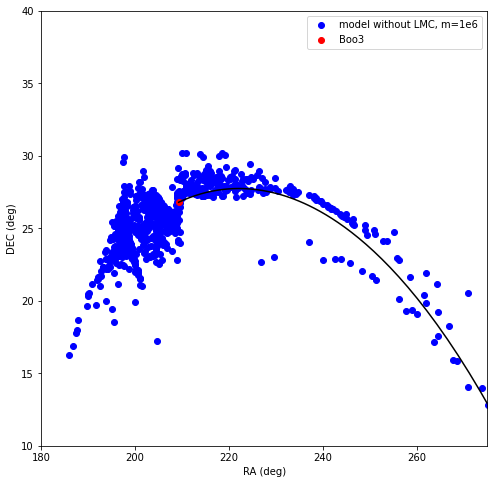

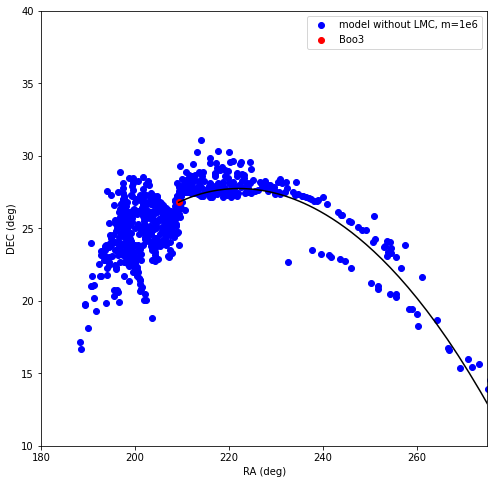

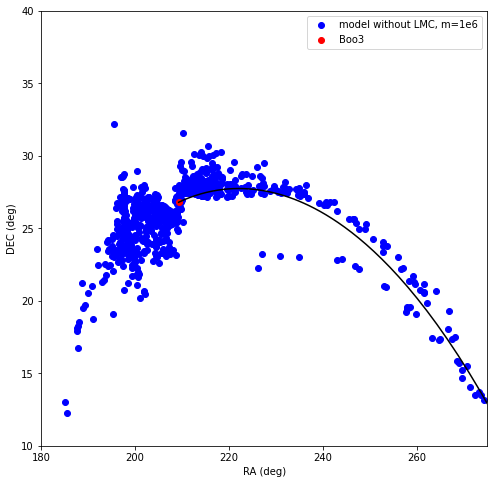

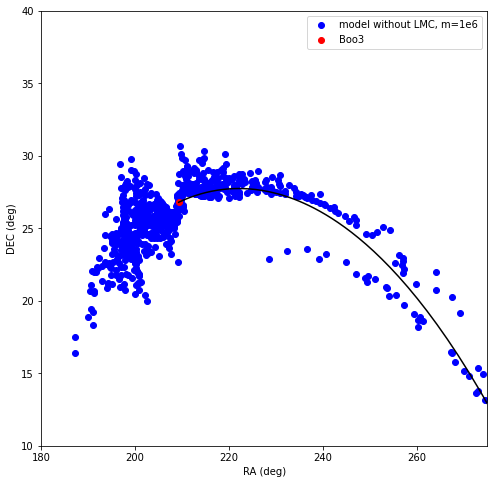

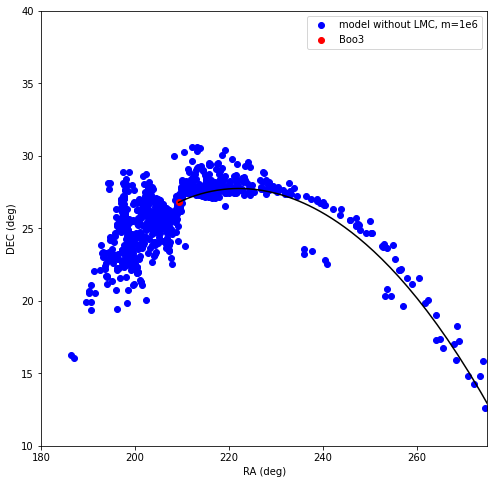

In [10]:
for oall in group:

    fig = plt.figure(figsize=(8,8))

    plt.scatter(oall.ra(), oall.dec(), label='model without LMC, m=1e6', c='blue')
    #plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
    #plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
    plt.scatter(ot.ra(),ot.dec(),label='Boo3', c='red')
    plt.plot(ot.ra(ts), ot.dec(ts), 'k-')
    plt.xlim(180,275)
    plt.ylim(10,40)

    plt.xlabel('RA (deg)')
    plt.ylabel('DEC (deg)')
    plt.legend()
    plt.show()

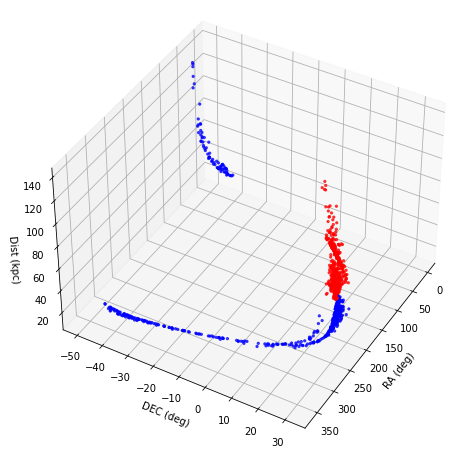

In [4]:
#%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(a.ra(), a.dec(), a.dist(), marker='.', c='red', alpha=0.7)
ax.scatter(b.ra(), b.dec(), b.dist(), marker='.', c='blue', alpha=0.7)
#im = ax.scatter(oall1.ra(), oall1.dec(), oall1.dist(), marker='.', c=-c*to, alpha=0.7)
#fig.colorbar(im)

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
ax.set_zlabel('Dist (kpc)')

ax.view_init(40,30)
plt.show()

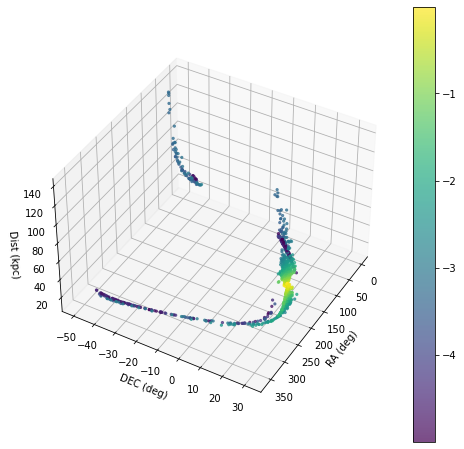

In [5]:
#%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
#ax.scatter(a.ra(), a.dec(), a.dist(), marker='.', c='red', alpha=0.7)
#ax.scatter(b.ra(), b.dec(), b.dist(), marker='.', c='blue', alpha=0.7)
im = ax.scatter(oall1.ra(), oall1.dec(), oall1.dist(), marker='.', c=-c*to, alpha=0.7)
fig.colorbar(im)

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
ax.set_zlabel('Dist (kpc)')

ax.view_init(40,30)
plt.show()

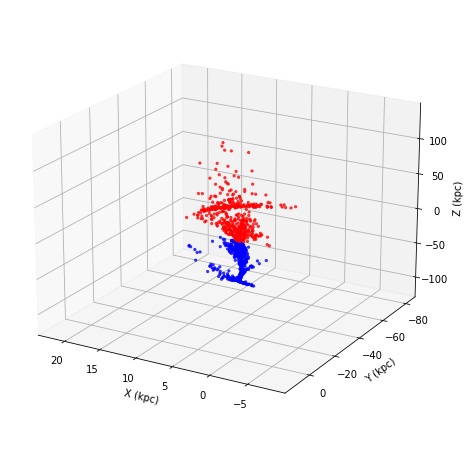

In [6]:
#%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(a.x(), a.y(), a.z(), marker='.', c='red', alpha=0.7)
ax.scatter(b.x(), b.y(), b.z(), marker='.', c='blue', alpha=0.7)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.view_init(20,120)
plt.show()

<IPython.core.display.Javascript object>


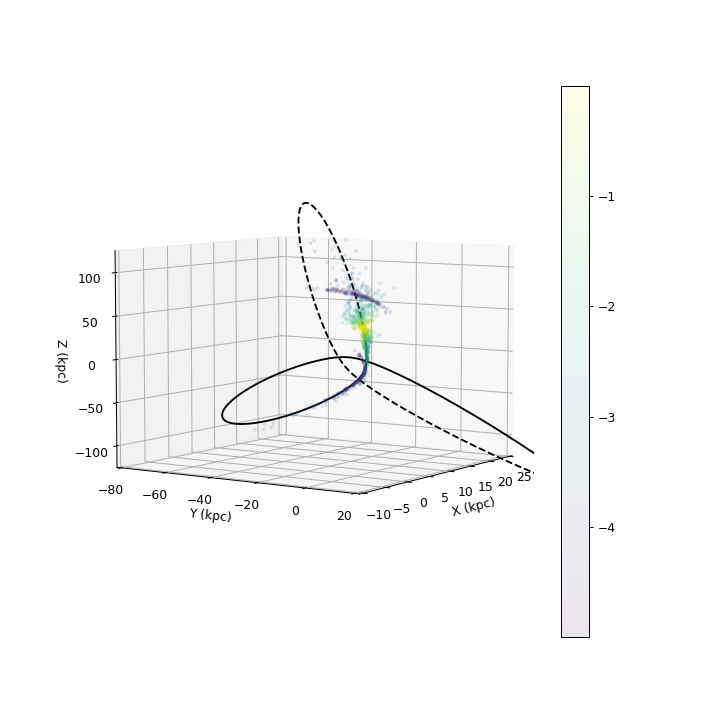

In [5]:
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
im = ax.scatter(oall1.x(), oall1.y(), oall1.z(), marker='.', c=-to*c, alpha=0.1)
ax.plot(ot.x(ts)*ro, ot.y(ts)*ro, ot.z(ts)*ro, 'k-')
ax.plot(of.x(-ts)*ro, of.y(-ts)*ro, of.z(-ts)*ro, 'k--')
#ax.scatter(b.x(), b.y(), b.z(), marker='.', c='blue', alpha=0.7)
fig.colorbar(im)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_xlim(-10,25)
ax.set_ylim(20,-80)
ax.set_zlim(-120,120)

ax.view_init(0,280)
plt.show()

In [9]:
stream_animation = graphics.StellarStream3D(ot, oall1, c, tdisrupt, pot=MWPotential2014, ro=8., vo=220.)

<IPython.core.display.Javascript object>


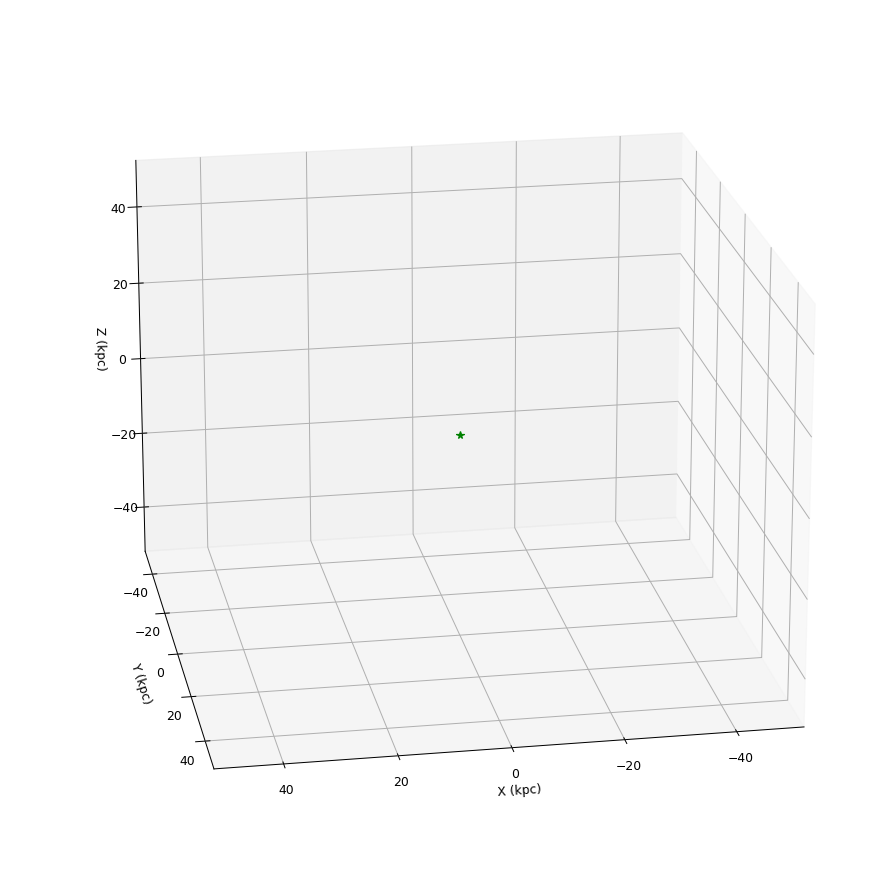

In [10]:
stream_animation._init_fig()

<IPython.core.display.Javascript object>


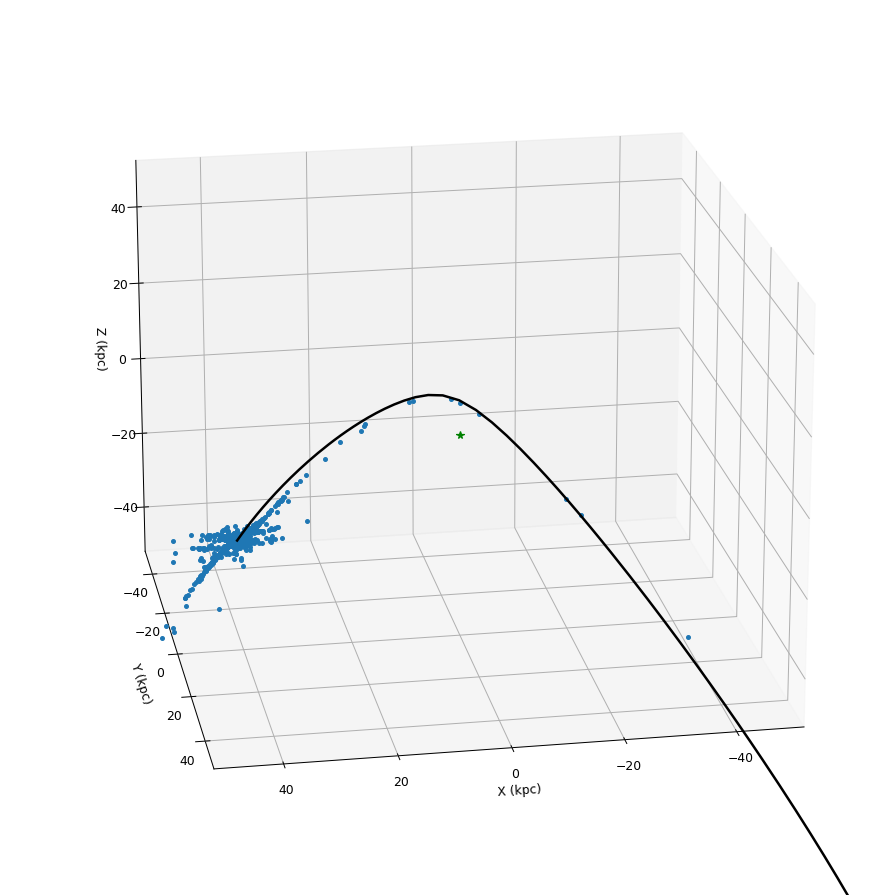

In [12]:
stream_animation.animate()

In [18]:
oall1.E(t=5,pot=MWPotential2014) - oall1.E(t=0,pot=MWPotential2014)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.